In [2]:
import torch
from d2l import torch as d2l
from torch import nn
%matplotlib inline

## Implementation from Scratch

#### Initializing Model Parameters

In [9]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn((num_inputs, num_hiddens)) * sigma) #Why did we multiple sigma?
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn((num_hiddens, num_outputs)) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

#### Model

In [10]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X,a)

In [11]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

#### Training

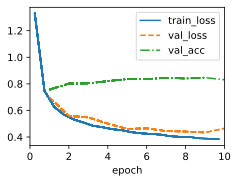

In [12]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

## Concise Implementation

#### Model

In [20]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(num_hiddens),
            nn.ReLU(),
            nn.LazyLinear(num_outputs)
        )

#### Training

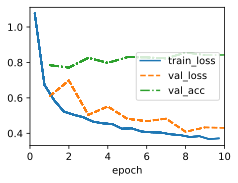

In [21]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

## Forward Propagation, Backward Propagation, and Computational Graphs

- **Backpropagation**: Essential for calculating gradients; central to deep learning model training.
- **Automatic Differentiation**: Simplifies gradient calculations, historically done manually.
- **Example Application**: Implementing backpropagation in a one-hidden-layer MLP with $\ell_2$ regularization.

#### Forward Propogation

- Forward Propagation: Involves calculating and storing intermediate variables from input to output layer in a neural network.
- Intermediate Variables and Activation: For an input $\mathbf{x}\in \mathbb{R}^d$, the hidden layer output without bias is $\mathbf{h} = \phi(\mathbf{W}^{(1)} \mathbf{x})$, where $\mathbf{W}^{(1)}$ is the weight of the hidden layer and $\phi$ is the activation function.
- Output Layer Calculation: The output $\mathbf{o}$ of length $q$ is computed as $\mathbf{o} = \mathbf{W}^{(2)} \mathbf{h}$, with $\mathbf{W}^{(2)}$ being the weight of the output layer.
- Loss Function and Regularization: The loss for a single data example is $L = l(\mathbf{o}, y)$. Including $\ell_2$ regularization with hyperparameter $\lambda$, the regularized loss is $J = L + \frac{\lambda}{2} (|\mathbf{W}^{(1)}|\textrm{F}^2 + |\mathbf{W}^{(2)}|\textrm{F}^2)$, where $J$ is the objective function.

#### Computational Graph
- **Computational Graph for Forward Propagation**: The graph visualizes dependencies and data flow in a neural network. Variables are represented as squares, operators as circles, with data flowing primarily rightward and upward, from the lower-left (input) to the upper-right (output). ![Computational graph of forward propagation](http://d2l.ai/_images/forward.svg)

#### Backpropogation

1. **Backpropagation Overview**: Method to calculate gradients of neural network parameters, traversing the network in reverse (output to input) using the chain rule.
2. **Chain Rule Application**: Derivatives computed as $\frac{\partial \mathsf{Z}}{\partial \mathsf{X}} = \textrm{prod}(\frac{\partial \mathsf{Z}}{\partial \mathsf{Y}}, \frac{\partial \mathsf{Y}}{\partial \mathsf{X}})$, handling vectors and higher-dimensional tensors.
3. **Gradient Calculations**: Includes computing gradients of objective function $J = L + s$ with respect to each layer and parameter, utilizing the chain rule and elementwise multiplication.
4. **Final Gradients**: The gradients $\partial J/\partial \mathbf{W}^{(1)}$ and $\partial J/\partial \mathbf{W}^{(2)}$ are computed for the model parameters, incorporating the $\ell_2$ regularization term.